# Assignment 2: Linear Regression

###Guidelines

- You may work alone, or in teams, and collaboration between teams is allowed
- Due **Tuesday 7/28 6.30pm** in [our Google Drive](https://drive.google.com/drive/folders/0B4Z0Mpa9wB9rfm5PQWhXRUVZRnQzTFY5a1I0d0hsZnZ4MnkxVWV0Q1psbUdBX2RUMVBsZ3M) folder

 
### The Problem
In this assignment, we are going to recreate the Kaggle competition to predict salaries based on job descriptions: http://www.kaggle.com/c/job-salary-prediction.  This problem came from a company called [Adzuna](http://www.adzuna.co.uk/), that wanted to be able to predict the salary of a job just based on it's description.

### The Data
We've paired down the problem a bit to make the dataset small and allow you to complete it in a reasonable time frame.  There are 3 important files available.

1. [train.csv](http://gadatascience.com/datasets/adzuna_salary_prediction/train.csv)
1. [test.csv](http://gadatascience.com/datasets/adzuna_salary_prediction/test.csv)
1. [Location_Tree.csv](https://www.dropbox.com/s/hhieedt1b92adw5/Location_Tree.csv?dl=0)

You will train and test your model on the `train.csv` dataset. This dataset is reasonably small, with 10k samples, so you can work smoothly. If you'd like to use larger datasets, you could try [train-50k.csv](https://www.dropbox.com/s/ssc14lubyua8hii/train_50k.csv?dl=0) or even [train-100k.csv](https://www.dropbox.com/s/tau4sv0vusr8xca/train_100k.csv?dl=0).

If you have found a model you like, you can make predictions on the samples of the `test.csv` dataset. The test files contains all but the final two columns (the salary information), so you won't know how well you do. We will compare your predictions with those from the other students.



### Assignment

Your job is to submit
- a commented IPython notebook with some of the things you tried,
- your best predictions for the test file, in a file `[your_name]_predictions.csv`, in the format
    ```
    Id, Salary
    1234, 77999
    2345, 88999
    ```

At any point in the following steps you can use your model to predict salaries on the final test set and submit. 
Some bullets have stars and rank from Basic (no star) to Challenging (3 stars)

- 1 star (\*) - Try these out but they will be harder
- 2 stars (\*\*) - For those looking for a challenge or really explore the topic
- 3 stars (\*\*\*) - Test out some of the ideas using different tools

###Steps

1. Split the data into training and test sets (using one of the training files above).  You will use one as your training set and the other for validation.  At the end you may train your final parameters on the full dataset.

1. Build a simple linear regression using the available categorical variables.  Try adding and dropping parameters and see if they improve the model.  Try adding interaction effects to improve your model. (Note: beware of the computational overhead) Compare both R-squared and MAE on your test set. 

1. Perform cross-validation to verify that the inclusion (or exclusion) of any variables provides a tangible improvement to the model.

1. (\*) Use the regularization options available to attempt to improve the model

1. (\*\*) Now let's try adding some text features.  You can create these by hand using `.map` on your dataframe or using scikits-learn and the `CountVectorizer` (import from `sklearn.feature_extraction.text`)

1. (\*\*) Merge `location_tree.csv` on to your dataset - do any features from here to improve performance. You'll need to convert this file before you can effectively use it.

1. (\*\*) If you were just loading the `train.csv` file so far, try loading one of the large datasets.  Does the larger dataset improve performance on the held-out test set?  If possible, try loading an even larger file.


<hr>
#Hints
###Exploring data

In [1]:
import pandas as pd
data = pd.read_csv('/Users/ruben/Downloads/train.csv')
data.head(2)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk


Show how many unique values each column has.

In [2]:
for col in data.columns:
    print col, data[col].nunique()

Id 10000
Title 8273
FullDescription 9940
LocationRaw 2399
LocationNormalized 899
ContractType 2
ContractTime 2
Company 1197
Category 28
SalaryRaw 5780
SalaryNormalized 1023
SourceName 74


Let's plot the salary distribution.

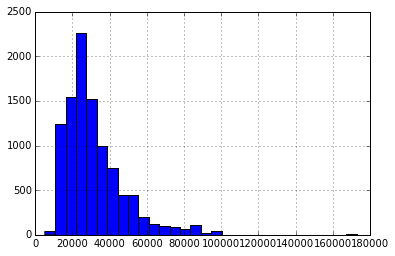

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
f = data.SalaryNormalized.hist(bins=30)

(Note that it might makes sense to predict log salaries instead of salaries directly.)

### Modeling

Use `patsy` and `dmatrix` or `dmatrices` to create your feature matrix for categorical features.

In [4]:
from patsy import dmatrices
Y, X = dmatrices("SalaryNormalized ~ ContractTime", data=data, return_type='dataframe')
y = Y.SalaryNormalized

Let's use a Lasso model.

(It might make sense to try out `Lasso` as well as `LinearRegression` and `Ridge`, and for different regularization parameters `alpha`, to find the model with the best result.)

In [5]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=.01)
model.fit(X, y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
model.score(X, y)  # Note: this is the R2 score on the training set (so no cross-validation!)

0.0082646541392438211

This is very bad, but regression with text processing has never really high $R^2$, so let's look at the mean absolute error, which is a little more intuitive.

In [7]:
import numpy as np
np.abs(model.predict(X) - y).mean()  # Mean Absolute Error

12754.312640498576

So we're almost $12,800 off, on average.

In [8]:
y_pred = model.predict(X)

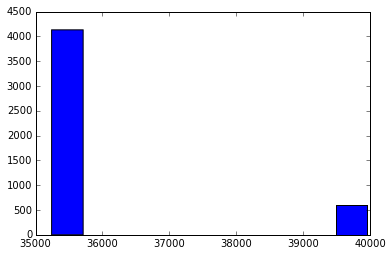

In [9]:
f = plt.hist(y_pred)

Let's try a fancier model using job categories.

In [10]:
Y, X = dmatrices("SalaryNormalized ~ ContractTime + Category", data=data, return_type='dataframe')

In [11]:
model.fit(X, y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
print model.score(X, y)  # R2 score on training set
print np.abs(model.predict(X) - y).mean()  # Mean Absolute Error

0.179513225432
11404.9055947


Better!

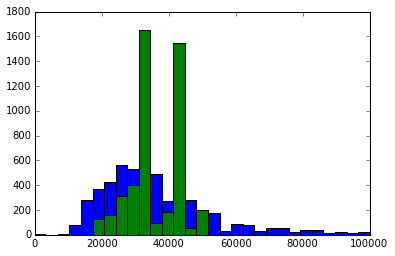

In [13]:
bins = np.linspace(1, 100000, 30)
f = plt.hist(y, bins=bins)
f = plt.hist(model.predict(X), bins=bins)

Now with cross-validation.

In [14]:
from sklearn.cross_validation import cross_val_score
print -cross_val_score(model, X, y, cv=10, scoring="mean_absolute_error").mean()
print -np.median(cross_val_score(model, X, y, cv=10, scoring="median_absolute_error"))

11579.0110234
8914.94767542


### Adding self-made features

You can be creative and add features you might think help our model.

In [15]:
data['has_manager'] = data.Title.map(lambda x: int(str(x).lower().find('manager') > -1) if x is not None else None)

In [16]:
data.head(2)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,has_manager
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,0
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,0


In [17]:
data.columns

Index([u'Id', u'Title', u'FullDescription', u'LocationRaw',
       u'LocationNormalized', u'ContractType', u'ContractTime', u'Company',
       u'Category', u'SalaryRaw', u'SalaryNormalized', u'SourceName',
       u'has_manager'],
      dtype='object')

In [18]:
Y, X = dmatrices("SalaryNormalized ~ ContractTime + Category + has_manager", data=data, return_type='dataframe')

In [19]:
print np.mean(-cross_val_score(model, X, y, cv=10, scoring="mean_absolute_error"))
print np.median(-cross_val_score(model, X, y, cv=10, scoring="median_absolute_error"))

11126.0306714
8488.13352512


Almost $500 improvement.

As a note, I would **definitely look at `the mean_squared_error`**, and not only at the `median_squared_error`, as you'd like your predictions also be good for the upper percentiles.

### Making predictions for the test set

We're gonna concatenate the training and test set, so we're sure our feature matrices are aligned.

In [20]:
test = pd.read_csv('/Users/ruben/Downloads/test.csv')

In [21]:
df = pd.concat([data, test])
len(data), len(test), len(df)

(10000, 5000, 15000)

In [22]:
df['has_manager'] = df.Title.map(lambda x: int(str(x).lower().find('manager') > -1) if x is not None else None)

In [23]:
df['SalaryNormalized'] = df.SalaryNormalized.fillna(0).astype(int)

In [24]:
Y, X = dmatrices("SalaryNormalized ~ ContractTime + Category + has_manager", data=df.fillna("unknown"), return_type='dataframe')

In [25]:
X_train, y_train = X[:len(data)], Y.SalaryNormalized[:len(data)]
X_test = X[len(data):]

In [26]:
model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

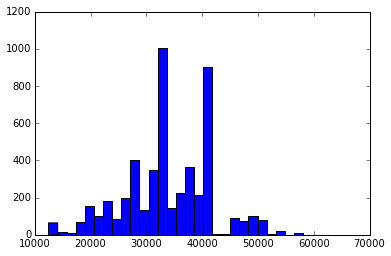

In [27]:
y_predictions = model.predict(X_test)
f = plt.hist(y_predictions, bins=30)

### Saving your predictions to disk

In [28]:
preds = pd.DataFrame(y_predictions, index=test.Id, columns=['Salary'])
preds.to_csv('/Users/ruben/Desktop/[your_name_here]_predictions.csv')